In [2]:
%matplotlib notebook
import pandas as pd
import geopandas as gpd
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=Warning)
#from tsfeatures import tsfeatures
import numpy as np
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Read Pickle
rpath="D:/Data/students/mariana/data"
GWfilldatamod=pd.read_pickle(rpath+"/Pickle/GWfilldatamod.pkl")
gw_sel_int=gpd.read_file(rpath+"/SHP/gw_sel_int.shp")

In [4]:
dfraw=GWfilldatamod.GW_NN[1]
df=dfraw[[dfraw.columns[0],dfraw.columns[-1]]]
df["id"]=[dfraw.columns[-1]]*len(df)  #give the unique code as the library requested it 
dfc=df.copy()
dfc.rename(columns={dfraw.columns[0]: "time", dfraw.columns[-1]: "y"}, inplace=True)

In [6]:
lfeatures=extracted_features.columns  #List from previous run

for dfraw in GWfilldatamod.GW_NN:
    df=dfraw[[dfraw.columns[0],dfraw.columns[-1]]]
    df["id"]=[dfraw.columns[-1]]*len(df)  #give the unique code as the library requested it 
    
    #well id as an integer to search in the gw_sel file--> shapefile witht the well locations
    wellid=int(dfraw.columns[-1].split("_")[-1])
    indv=gw_sel_int[gw_sel_int.MEST_ID==wellid].index[0]
    
    #Copy the dataframe to avoid modifications in the original one. 
    dfc=df.copy()
    dfc.rename(columns={dfraw.columns[0]: "time", dfraw.columns[-1]: "y"}, inplace=True)
    feat=extract_features(dfc, column_id="id", column_sort="time")
    
    for c in lfeatures:
        gw_sel_int.at[indv,c]=feat[c][0] 

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.15s/it]


Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.57s/it]


Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.40s/it]


Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.22s/it]


In [8]:
gw_sel_int['r2+NSE']=gw_sel_int['r2']+gw_sel_int['NSE']
gw_sel_int['r2_2+NSE_2']=gw_sel_int['r2_2']+gw_sel_int['NSE_2']

In [32]:
lfeatures=list(lfeatures)
lrem=["y__has_duplicate",
      "y__symmetry_looking__r_0.0",
      "y__symmetry_looking__r_0.1",
      "y__symmetry_looking__r_0.15000000000000002",
      "y__symmetry_looking__r_0.2",
      "y__symmetry_looking__r_0.25",
      "y__symmetry_looking__r_0.30000000000000004",
      "y__symmetry_looking__r_0.35000000000000003",
"y__symmetry_looking__r_0.4",
"y__symmetry_looking__r_0.45",
"y__symmetry_looking__r_0.5",
"y__symmetry_looking__r_0.55",
"y__symmetry_looking__r_0.6000000000000001",
"y__symmetry_looking__r_0.65",
"y__symmetry_looking__r_0.7000000000000001",
"y__symmetry_looking__r_0.75",
"y__symmetry_looking__r_0.8",
"y__symmetry_looking__r_0.8500000000000001",
"y__symmetry_looking__r_0.9",
"y__symmetry_looking__r_0.9500000000000001",
"y__large_standard_deviation__r_0.05",
"y__large_standard_deviation__r_0.1",
"y__large_standard_deviation__r_0.30000000000000004",
"y__large_standard_deviation__r_0.35000000000000003",
"y__large_standard_deviation__r_0.4",
"y__large_standard_deviation__r_0.45",
"y__large_standard_deviation__r_0.5",
"y__large_standard_deviation__r_0.55",
"y__large_standard_deviation__r_0.6000000000000001",
"y__large_standard_deviation__r_0.65",
"y__large_standard_deviation__r_0.7000000000000001",
"y__large_standard_deviation__r_0.75",
"y__large_standard_deviation__r_0.8",
"y__large_standard_deviation__r_0.8500000000000001",
"y__large_standard_deviation__r_0.9",
"y__large_standard_deviation__r_0.9500000000000001",
"y__partial_autocorrelation__lag_0",
'y__fft_coefficient__attr_"imag"__coeff_0',
"y__ratio_beyond_r_sigma__r_6",
"y__ratio_beyond_r_sigma__r_7",
"y__ratio_beyond_r_sigma__r_10",
]
#"y_kurtosis"
lrem2=['y__kurtosis',"y__absolute_sum_of_changes",  'y__agg_autocorrelation__f_agg_"mean"__maxlag_40',
       'y__agg_autocorrelation__f_agg_"median"__maxlag_40',
'y__agg_autocorrelation__f_agg_"var"__maxlag_40', "y__friedrich_coefficients__coeff_0__m_3__r_30",
"y__friedrich_coefficients__coeff_1__m_3__r_30",
"y__friedrich_coefficients__coeff_2__m_3__r_30",
"y__friedrich_coefficients__coeff_3__m_3__r_30", "y__number_cwt_peaks__n_1",
"y__number_cwt_peaks__n_5","y__binned_entropy__max_bins_10", 
"y__ar_coefficient__coeff_1__k_10",
"y__ar_coefficient__coeff_7__k_10",
"y__ar_coefficient__coeff_10__k_10",
'y__fft_coefficient__attr_"abs"__coeff_1',
'y__fft_coefficient__attr_"abs"__coeff_2',
'y__fft_coefficient__attr_"abs"__coeff_33',
'y__fft_coefficient__attr_"abs"__coeff_47',
'y__fft_coefficient__attr_"abs"__coeff_75',
'y__fft_coefficient__attr_"abs"__coeff_78',
'y__fft_coefficient__attr_"abs"__coeff_79',
'y__fft_coefficient__attr_"abs"__coeff_84',
'y__fft_coefficient__attr_"abs"__coeff_85',
'y__fft_coefficient__attr_"abs"__coeff_86',
'y__fft_coefficient__attr_"abs"__coeff_90',
'y__fft_coefficient__attr_"abs"__coeff_95',
'y__fft_coefficient__attr_"abs"__coeff_96',
'y__fft_aggregated__aggtype_"kurtosis"',
'y__range_count__max_1000000000000.0__min_0','y__max_langevin_fixed_point__m_3__r_30',
'y__linear_trend__attr_"rvalue"',
'y__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"max"',
'y__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"min"',
'y__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"mean"',
'y__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"max"',
'y__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"min"',
'y__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"mean"',
'y__agg_linear_trend__attr_"rvalue"__chunk_len_50__f_agg_"var"',
'y__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"min"',
'y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"min"',
'y__augmented_dickey_fuller__attr_"teststat"__autolag_"AIC"',
"y__count_above__t_0",
"y__count_below__t_0" ,
'y__query_similarity_count__query_None__threshold_0.0']

lrem3=['y__autocorrelation__lag_0',
'y__autocorrelation__lag_1',
'y__autocorrelation__lag_2',
'y__autocorrelation__lag_3',
'y__autocorrelation__lag_4','y__autocorrelation__lag_5','y__autocorrelation__lag_7',
      'y__autocorrelation__lag_8','y__autocorrelation__lag_9','y__partial_autocorrelation__lag_1',
      'y__partial_autocorrelation__lag_2',
       'y__partial_autocorrelation__lag_4',
       'y__partial_autocorrelation__lag_5','y__partial_autocorrelation__lag_8','y__partial_autocorrelation__lag_9']
#for i in lrem:
#    lfeatures.remove(i)
    
#for i in lrem2:
#    lfeatures.remove(i)

for i in lrem3:
    lfeatures.remove(i)

In [33]:
perfor=['r2','NSE', 'r2_2', 'NSE_2','r2+NSE','r2_2+NSE_2']

#Create dataframe to store the correlations
lzero=np.zeros(len(lfeatures))
d = {'variable': lfeatures, 'r2': lzero,'NSE':lzero, 'r2_2':lzero, 'NSE_2':lzero}
dfrval = pd.DataFrame(data=d)
dfslope = pd.DataFrame(data=d)
pval = pd.DataFrame(data=d)

#gw_sel_intc=gw_sel_int.copy()

for p in perfor:
    lslope, lrvalue, pvalue= [],[], []
    
    for col in lfeatures:


        slope, intercept, r_value, p_value, std_err = stats.linregress(gw_sel_int[col], 
                                                                           gw_sel_int[p]) 

        if p_value >= 0.1 :
            lrvalue.append(0)

        else:
            lrvalue.append(round(r_value,2))

        lslope.append(round(slope,2))

        pvalue.append(round(p_value,2))

        print(col)
    dfslope[p]=lslope
    dfrval[p]=lrvalue
    pval[p]=pvalue

y__variance_larger_than_standard_deviation
y__has_duplicate_max
y__has_duplicate_min
y__sum_values
y__abs_energy
y__mean_abs_change
y__mean_change
y__mean_second_derivative_central
y__median
y__mean
y__length
y__standard_deviation
y__variation_coefficient
y__variance
y__skewness
y__root_mean_square
y__longest_strike_below_mean
y__longest_strike_above_mean
y__count_above_mean
y__count_below_mean
y__last_location_of_maximum
y__first_location_of_maximum
y__last_location_of_minimum
y__first_location_of_minimum
y__percentage_of_reoccurring_values_to_all_values
y__percentage_of_reoccurring_datapoints_to_all_datapoints
y__sum_of_reoccurring_values
y__sum_of_reoccurring_data_points
y__ratio_value_number_to_time_series_length
y__sample_entropy
y__maximum
y__absolute_maximum
y__minimum
y__benford_correlation
y__time_reversal_asymmetry_statistic__lag_1
y__time_reversal_asymmetry_statistic__lag_2
y__time_reversal_asymmetry_statistic__lag_3
y__c3__lag_1
y__c3__lag_2
y__c3__lag_3
y__cid_ce__normaliz

y__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.4
y__change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.6
y__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.6
y__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.6
y__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.6
y__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.6
y__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.6
y__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.6
y__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.6
y__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.8
y__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.8
y__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.8
y__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.8
y__fft_coefficient__attr_"real"__coeff_0
y__fft_coefficient__attr_"real"__coeff_1
y__fft_coefficient__attr_"real"__coeff_2
y__fft_coefficient__attr_"real"__coeff_3
y__fft_coefficient__attr_"real"

y__fft_coefficient__attr_"abs"__coeff_3
y__fft_coefficient__attr_"abs"__coeff_4
y__fft_coefficient__attr_"abs"__coeff_5
y__fft_coefficient__attr_"abs"__coeff_6
y__fft_coefficient__attr_"abs"__coeff_7
y__fft_coefficient__attr_"abs"__coeff_8
y__fft_coefficient__attr_"abs"__coeff_9
y__fft_coefficient__attr_"abs"__coeff_10
y__fft_coefficient__attr_"abs"__coeff_11
y__fft_coefficient__attr_"abs"__coeff_12
y__fft_coefficient__attr_"abs"__coeff_13
y__fft_coefficient__attr_"abs"__coeff_14
y__fft_coefficient__attr_"abs"__coeff_15
y__fft_coefficient__attr_"abs"__coeff_16
y__fft_coefficient__attr_"abs"__coeff_17
y__fft_coefficient__attr_"abs"__coeff_18
y__fft_coefficient__attr_"abs"__coeff_19
y__fft_coefficient__attr_"abs"__coeff_20
y__fft_coefficient__attr_"abs"__coeff_21
y__fft_coefficient__attr_"abs"__coeff_22
y__fft_coefficient__attr_"abs"__coeff_23
y__fft_coefficient__attr_"abs"__coeff_24
y__fft_coefficient__attr_"abs"__coeff_25
y__fft_coefficient__attr_"abs"__coeff_26
y__fft_coefficient__att

y__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"max"
y__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"min"
y__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"mean"
y__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"var"
y__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"max"
y__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"min"
y__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"mean"
y__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"var"
y__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"max"
y__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"min"
y__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"mean"
y__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"var"
y__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"max"
y__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"mean"
y__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"var"
y__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"max"
y__agg_l

y__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.0
y__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.0
y__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.0
y__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.0
y__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.0
y__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0
y__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.0
y__change_quantiles__f_agg_"mean"__isabs_False__qh_0.4__ql_0.2
y__change_quantiles__f_agg_"var"__isabs_False__qh_0.4__ql_0.2
y__change_quantiles__f_agg_"mean"__isabs_True__qh_0.4__ql_0.2
y__change_quantiles__f_agg_"var"__isabs_True__qh_0.4__ql_0.2
y__change_quantiles__f_agg_"mean"__isabs_False__qh_0.6__ql_0.2
y__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.2
y__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.2
y__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.2
y__change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.2
y__chang

y__fft_coefficient__attr_"imag"__coeff_92
y__fft_coefficient__attr_"imag"__coeff_93
y__fft_coefficient__attr_"imag"__coeff_94
y__fft_coefficient__attr_"imag"__coeff_95
y__fft_coefficient__attr_"imag"__coeff_96
y__fft_coefficient__attr_"imag"__coeff_97
y__fft_coefficient__attr_"imag"__coeff_98
y__fft_coefficient__attr_"imag"__coeff_99
y__fft_coefficient__attr_"abs"__coeff_0
y__fft_coefficient__attr_"abs"__coeff_3
y__fft_coefficient__attr_"abs"__coeff_4
y__fft_coefficient__attr_"abs"__coeff_5
y__fft_coefficient__attr_"abs"__coeff_6
y__fft_coefficient__attr_"abs"__coeff_7
y__fft_coefficient__attr_"abs"__coeff_8
y__fft_coefficient__attr_"abs"__coeff_9
y__fft_coefficient__attr_"abs"__coeff_10
y__fft_coefficient__attr_"abs"__coeff_11
y__fft_coefficient__attr_"abs"__coeff_12
y__fft_coefficient__attr_"abs"__coeff_13
y__fft_coefficient__attr_"abs"__coeff_14
y__fft_coefficient__attr_"abs"__coeff_15
y__fft_coefficient__attr_"abs"__coeff_16
y__fft_coefficient__attr_"abs"__coeff_17
y__fft_coefficie

y__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"min"
y__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"mean"
y__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"var"
y__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"max"
y__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"min"
y__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"mean"
y__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"var"
y__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"max"
y__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"mean"
y__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"var"
y__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"max"
y__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"min"
y__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"mean"
y__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"var"
y__agg_linear_trend__attr_"stderr"__chunk_len_10__f_agg_"max"
y__agg_linear_trend__attr_"stderr"__chunk_len_10__f_agg_"min"
y__agg_linear_trend__

y__change_quantiles__f_agg_"mean"__isabs_False__qh_0.2__ql_0.0
y__change_quantiles__f_agg_"var"__isabs_False__qh_0.2__ql_0.0
y__change_quantiles__f_agg_"mean"__isabs_True__qh_0.2__ql_0.0
y__change_quantiles__f_agg_"var"__isabs_True__qh_0.2__ql_0.0
y__change_quantiles__f_agg_"mean"__isabs_False__qh_0.4__ql_0.0
y__change_quantiles__f_agg_"var"__isabs_False__qh_0.4__ql_0.0
y__change_quantiles__f_agg_"mean"__isabs_True__qh_0.4__ql_0.0
y__change_quantiles__f_agg_"var"__isabs_True__qh_0.4__ql_0.0
y__change_quantiles__f_agg_"mean"__isabs_False__qh_0.6__ql_0.0
y__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.0
y__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.0
y__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.0
y__change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.0
y__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.0
y__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.0
y__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.0
y__chang

y__fft_coefficient__attr_"imag"__coeff_85
y__fft_coefficient__attr_"imag"__coeff_86
y__fft_coefficient__attr_"imag"__coeff_87
y__fft_coefficient__attr_"imag"__coeff_88
y__fft_coefficient__attr_"imag"__coeff_89
y__fft_coefficient__attr_"imag"__coeff_90
y__fft_coefficient__attr_"imag"__coeff_91
y__fft_coefficient__attr_"imag"__coeff_92
y__fft_coefficient__attr_"imag"__coeff_93
y__fft_coefficient__attr_"imag"__coeff_94
y__fft_coefficient__attr_"imag"__coeff_95
y__fft_coefficient__attr_"imag"__coeff_96
y__fft_coefficient__attr_"imag"__coeff_97
y__fft_coefficient__attr_"imag"__coeff_98
y__fft_coefficient__attr_"imag"__coeff_99
y__fft_coefficient__attr_"abs"__coeff_0
y__fft_coefficient__attr_"abs"__coeff_3
y__fft_coefficient__attr_"abs"__coeff_4
y__fft_coefficient__attr_"abs"__coeff_5
y__fft_coefficient__attr_"abs"__coeff_6
y__fft_coefficient__attr_"abs"__coeff_7
y__fft_coefficient__attr_"abs"__coeff_8
y__fft_coefficient__attr_"abs"__coeff_9
y__fft_coefficient__attr_"abs"__coeff_10
y__fft_co

y__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"mean"
y__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"var"
y__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"max"
y__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"min"
y__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"mean"
y__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"var"
y__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"max"
y__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"min"
y__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"mean"
y__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"var"
y__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"max"
y__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"min"
y__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"mean"
y__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"var"
y__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"max"
y__agg_linear_trend__attr_"slope"__chunk_len_10

y__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.0
y__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.0
y__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.0
y__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.0
y__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.0
y__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0
y__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.0
y__change_quantiles__f_agg_"mean"__isabs_False__qh_0.4__ql_0.2
y__change_quantiles__f_agg_"var"__isabs_False__qh_0.4__ql_0.2
y__change_quantiles__f_agg_"mean"__isabs_True__qh_0.4__ql_0.2
y__change_quantiles__f_agg_"var"__isabs_True__qh_0.4__ql_0.2
y__change_quantiles__f_agg_"mean"__isabs_False__qh_0.6__ql_0.2
y__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.2
y__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.2
y__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.2
y__change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.2
y__chang

y__fft_coefficient__attr_"imag"__coeff_86
y__fft_coefficient__attr_"imag"__coeff_87
y__fft_coefficient__attr_"imag"__coeff_88
y__fft_coefficient__attr_"imag"__coeff_89
y__fft_coefficient__attr_"imag"__coeff_90
y__fft_coefficient__attr_"imag"__coeff_91
y__fft_coefficient__attr_"imag"__coeff_92
y__fft_coefficient__attr_"imag"__coeff_93
y__fft_coefficient__attr_"imag"__coeff_94
y__fft_coefficient__attr_"imag"__coeff_95
y__fft_coefficient__attr_"imag"__coeff_96
y__fft_coefficient__attr_"imag"__coeff_97
y__fft_coefficient__attr_"imag"__coeff_98
y__fft_coefficient__attr_"imag"__coeff_99
y__fft_coefficient__attr_"abs"__coeff_0
y__fft_coefficient__attr_"abs"__coeff_3
y__fft_coefficient__attr_"abs"__coeff_4
y__fft_coefficient__attr_"abs"__coeff_5
y__fft_coefficient__attr_"abs"__coeff_6
y__fft_coefficient__attr_"abs"__coeff_7
y__fft_coefficient__attr_"abs"__coeff_8
y__fft_coefficient__attr_"abs"__coeff_9
y__fft_coefficient__attr_"abs"__coeff_10
y__fft_coefficient__attr_"abs"__coeff_11
y__fft_coe

y__fft_aggregated__aggtype_"centroid"
y__fft_aggregated__aggtype_"variance"
y__fft_aggregated__aggtype_"skew"
y__value_count__value_0
y__value_count__value_1
y__value_count__value_-1
y__range_count__max_1__min_-1
y__range_count__max_0__min_-1000000000000.0
y__approximate_entropy__m_2__r_0.1
y__approximate_entropy__m_2__r_0.3
y__approximate_entropy__m_2__r_0.5
y__approximate_entropy__m_2__r_0.7
y__approximate_entropy__m_2__r_0.9
y__linear_trend__attr_"pvalue"
y__linear_trend__attr_"intercept"
y__linear_trend__attr_"slope"
y__linear_trend__attr_"stderr"
y__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"var"
y__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"var"
y__agg_linear_trend__attr_"rvalue"__chunk_len_50__f_agg_"max"
y__agg_linear_trend__attr_"rvalue"__chunk_len_50__f_agg_"min"
y__agg_linear_trend__attr_"rvalue"__chunk_len_50__f_agg_"mean"
y__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"max"
y__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"min"
y__a

y__cwt_coefficients__coeff_8__w_2__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_8__w_5__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_8__w_20__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_9__w_2__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_9__w_5__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_9__w_20__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_10__w_2__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_10__w_5__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_10__w_20__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_11__w_2__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_11__w_5__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_11__w_10__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_11__w_20__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_12__w_2__widths_(2, 5, 10, 20)
y__cwt_coeffic

y__fft_coefficient__attr_"imag"__coeff_42
y__fft_coefficient__attr_"imag"__coeff_43
y__fft_coefficient__attr_"imag"__coeff_44
y__fft_coefficient__attr_"imag"__coeff_45
y__fft_coefficient__attr_"imag"__coeff_46
y__fft_coefficient__attr_"imag"__coeff_47
y__fft_coefficient__attr_"imag"__coeff_48
y__fft_coefficient__attr_"imag"__coeff_49
y__fft_coefficient__attr_"imag"__coeff_50
y__fft_coefficient__attr_"imag"__coeff_51
y__fft_coefficient__attr_"imag"__coeff_52
y__fft_coefficient__attr_"imag"__coeff_53
y__fft_coefficient__attr_"imag"__coeff_54
y__fft_coefficient__attr_"imag"__coeff_55
y__fft_coefficient__attr_"imag"__coeff_56
y__fft_coefficient__attr_"imag"__coeff_57
y__fft_coefficient__attr_"imag"__coeff_58
y__fft_coefficient__attr_"imag"__coeff_59
y__fft_coefficient__attr_"imag"__coeff_60
y__fft_coefficient__attr_"imag"__coeff_61
y__fft_coefficient__attr_"imag"__coeff_62
y__fft_coefficient__attr_"imag"__coeff_63
y__fft_coefficient__attr_"imag"__coeff_64
y__fft_coefficient__attr_"imag"__c

y__fft_coefficient__attr_"angle"__coeff_89
y__fft_coefficient__attr_"angle"__coeff_90
y__fft_coefficient__attr_"angle"__coeff_91
y__fft_coefficient__attr_"angle"__coeff_92
y__fft_coefficient__attr_"angle"__coeff_93
y__fft_coefficient__attr_"angle"__coeff_94
y__fft_coefficient__attr_"angle"__coeff_95
y__fft_coefficient__attr_"angle"__coeff_96
y__fft_coefficient__attr_"angle"__coeff_97
y__fft_coefficient__attr_"angle"__coeff_98
y__fft_coefficient__attr_"angle"__coeff_99
y__fft_aggregated__aggtype_"centroid"
y__fft_aggregated__aggtype_"variance"
y__fft_aggregated__aggtype_"skew"
y__value_count__value_0
y__value_count__value_1
y__value_count__value_-1
y__range_count__max_1__min_-1
y__range_count__max_0__min_-1000000000000.0
y__approximate_entropy__m_2__r_0.1
y__approximate_entropy__m_2__r_0.3
y__approximate_entropy__m_2__r_0.5
y__approximate_entropy__m_2__r_0.7
y__approximate_entropy__m_2__r_0.9
y__linear_trend__attr_"pvalue"
y__linear_trend__attr_"intercept"
y__linear_trend__attr_"slope"


y__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_10__w_20__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_11__w_2__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_11__w_5__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_11__w_10__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_11__w_20__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_12__w_2__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_12__w_5__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_12__w_10__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_12__w_20__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_13__w_5__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_13__w_10__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_13__w_20__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_14__w_2__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)
y__cwt_coefficients__coeff_14__w_10__widths_(2, 5, 10, 20)
y__cw

y__fft_coefficient__attr_"imag"__coeff_38
y__fft_coefficient__attr_"imag"__coeff_39
y__fft_coefficient__attr_"imag"__coeff_40
y__fft_coefficient__attr_"imag"__coeff_41
y__fft_coefficient__attr_"imag"__coeff_42
y__fft_coefficient__attr_"imag"__coeff_43
y__fft_coefficient__attr_"imag"__coeff_44
y__fft_coefficient__attr_"imag"__coeff_45
y__fft_coefficient__attr_"imag"__coeff_46
y__fft_coefficient__attr_"imag"__coeff_47
y__fft_coefficient__attr_"imag"__coeff_48
y__fft_coefficient__attr_"imag"__coeff_49
y__fft_coefficient__attr_"imag"__coeff_50
y__fft_coefficient__attr_"imag"__coeff_51
y__fft_coefficient__attr_"imag"__coeff_52
y__fft_coefficient__attr_"imag"__coeff_53
y__fft_coefficient__attr_"imag"__coeff_54
y__fft_coefficient__attr_"imag"__coeff_55
y__fft_coefficient__attr_"imag"__coeff_56
y__fft_coefficient__attr_"imag"__coeff_57
y__fft_coefficient__attr_"imag"__coeff_58
y__fft_coefficient__attr_"imag"__coeff_59
y__fft_coefficient__attr_"imag"__coeff_60
y__fft_coefficient__attr_"imag"__c

y__fft_coefficient__attr_"angle"__coeff_87
y__fft_coefficient__attr_"angle"__coeff_88
y__fft_coefficient__attr_"angle"__coeff_89
y__fft_coefficient__attr_"angle"__coeff_90
y__fft_coefficient__attr_"angle"__coeff_91
y__fft_coefficient__attr_"angle"__coeff_92
y__fft_coefficient__attr_"angle"__coeff_93
y__fft_coefficient__attr_"angle"__coeff_94
y__fft_coefficient__attr_"angle"__coeff_95
y__fft_coefficient__attr_"angle"__coeff_96
y__fft_coefficient__attr_"angle"__coeff_97
y__fft_coefficient__attr_"angle"__coeff_98
y__fft_coefficient__attr_"angle"__coeff_99
y__fft_aggregated__aggtype_"centroid"
y__fft_aggregated__aggtype_"variance"
y__fft_aggregated__aggtype_"skew"
y__value_count__value_0
y__value_count__value_1
y__value_count__value_-1
y__range_count__max_1__min_-1
y__range_count__max_0__min_-1000000000000.0
y__approximate_entropy__m_2__r_0.1
y__approximate_entropy__m_2__r_0.3
y__approximate_entropy__m_2__r_0.5
y__approximate_entropy__m_2__r_0.7
y__approximate_entropy__m_2__r_0.9
y__linear

In [34]:
pvalcc=pval.copy()
pvalcc.rename(columns={"r2": "r$^2$_rh", "NSE": "NSE_rh",
                         "r2_2":"r$^2$","NSE_2":"NSE",
                         "r2+NSE":"r$^2$+NSE_rh","r2_2+NSE_2":"r$^2$+NSE"}, inplace=True)

<IPython.core.display.Javascript object>


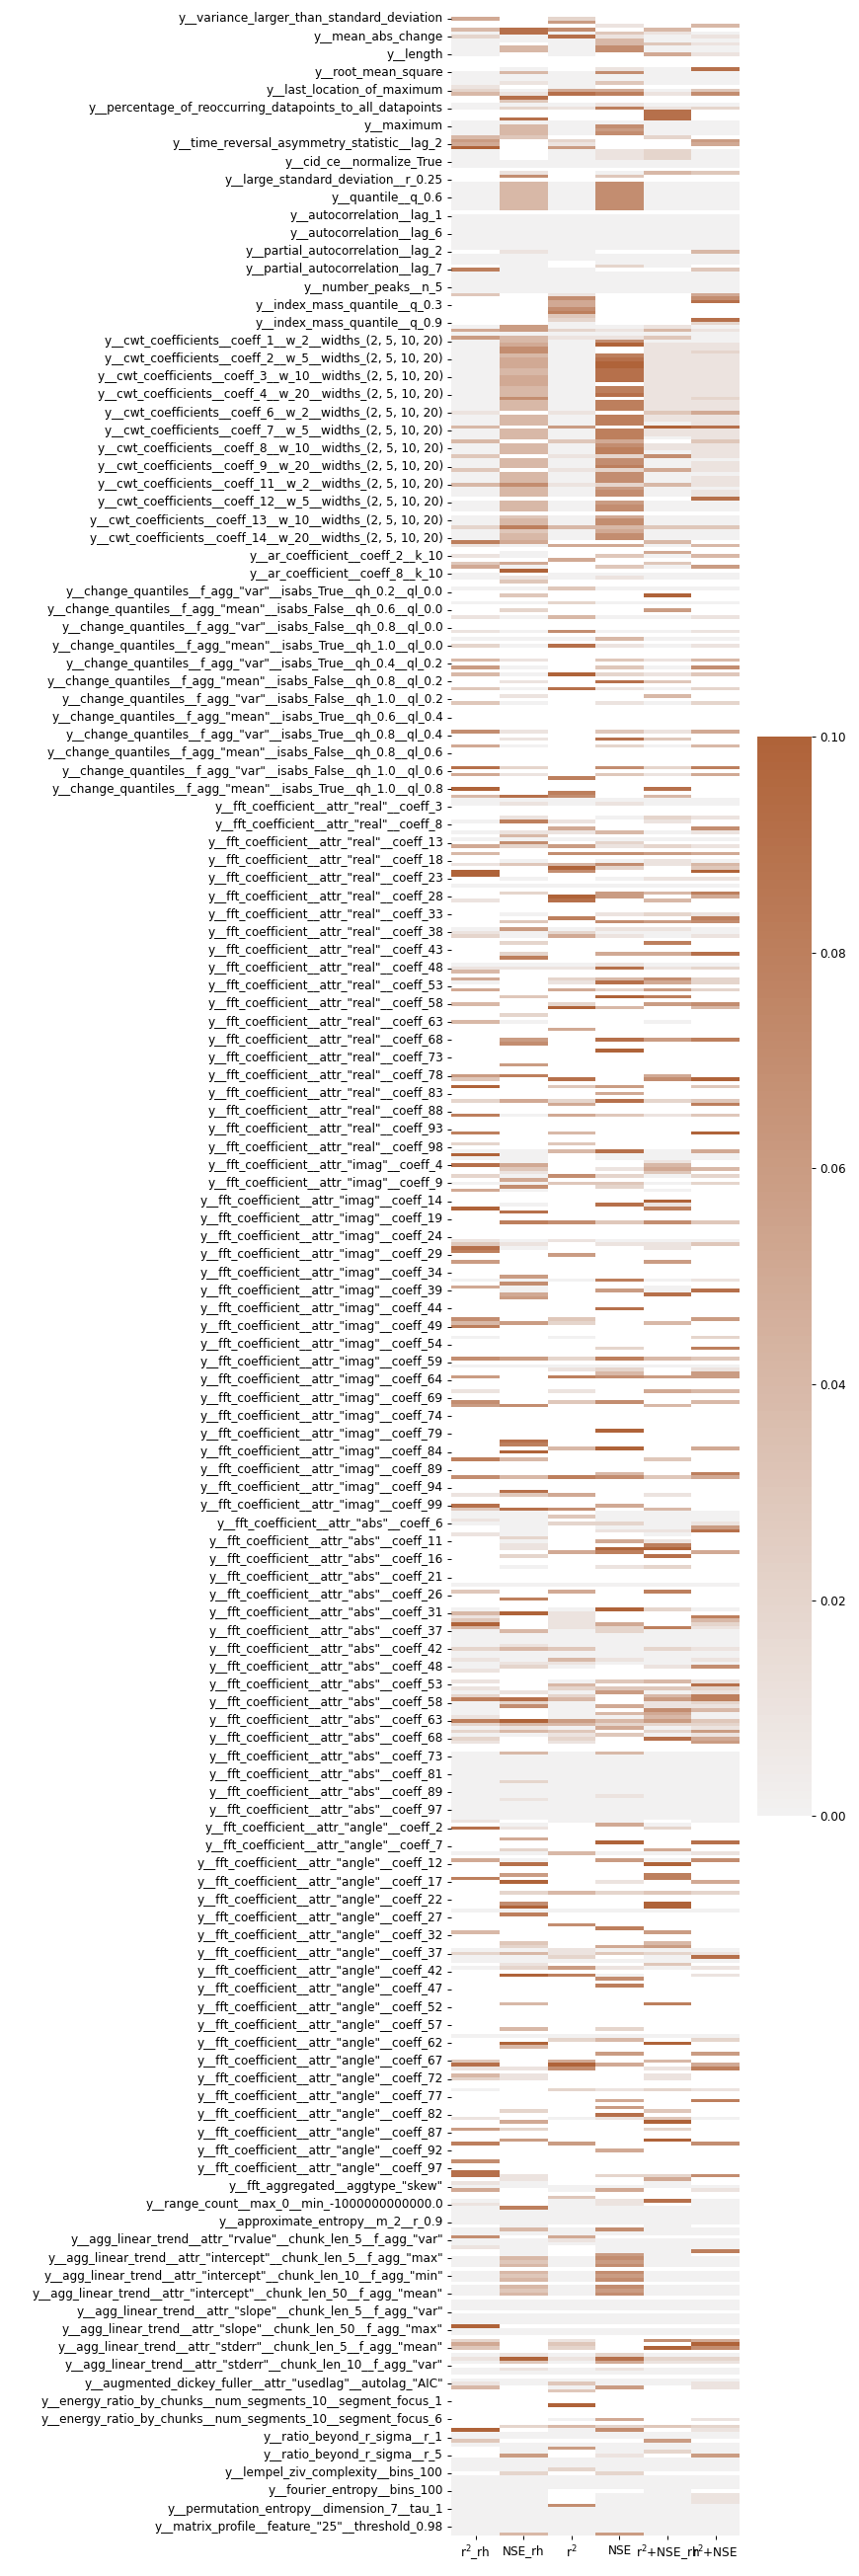

In [27]:
plt.figure(figsize=(10,30))
cmap = sns.diverging_palette(200, 30, as_cmap=True)
dat=pvalcc[:].set_index('variable')
sns.heatmap(dat[dat<=0.1], annot=False,cmap=cmap, center=0)
plt.ylabel(' ')
plt.tight_layout()

In [35]:
dfrvalcc=dfrval.copy()
dfrvalcc.rename(columns={"r2": "r$^2$_rh", "NSE": "NSE_rh",
                         "r2_2":"r$^2$","NSE_2":"NSE",
                         "r2+NSE":"r$^2$+NSE_rh","r2_2+NSE_2":"r$^2$+NSE"}, inplace=True)

In [36]:
dfaux=dfrvalcc[(dfrvalcc["r$^2$"] > -0.2)]
dfaux2=dfaux[(dfaux["r$^2$"] < 0.2)]
dfaux3=dfaux2[(dfaux2["NSE"] > -0.2)]
dfaux4=dfaux3[(dfaux3["NSE"] < 0.2)]

#dfrvalcc2[(dfrvalcc2["r$^2$_rh"] == 0.000)]["r$^2$_rh"].values

In [37]:
dfrvalcc2 = dfrvalcc.drop(dfaux4.index)

__Sample entropy__: Approximate Entropy and Sample Entropy are two algorithms for determining the regularity of series of data based on the existence of patterns. (ncbi.nlm.nih.gov/pmc/articles/PMC7515030/) 

__cid_ce__: This function calculator is an estimate for a time series complexity [1] (A more complex time series has more peaks, valleys etc.). 

__autocorrelation__:Calculates the autocorrelation of the specified lag

__Partial correlation__: is a method used to describe the relationship between two variables whilst taking away the effects of another variable, or several other variables, on this relationship.

__number_of_peaks__: Calculates the number of peaks of at least support n in the time series x. A peak of support n is defined as a subsequence of x where a value occurs, which is bigger than its n neighbours to the left and to the right.

__Lempel–Ziv complexity__ : The Lempel-Ziv complexity (LZ) is a popular tool to quantify the uncertainty contained in time series data. In particular, LZ measures how “diverse” are the patterns that are present in a particular signal. (https://information-dynamics.github.io/complexity/information/2019/06/26/lempel-ziv.html)

__Matrix profile__ : The distance profile is a vector of minimum Z-Normalized Euclidean Distances.The profile index contains the index of its first nearest-neighbor. In other words, it is the location of its most similar sub-sequence. (https://towardsdatascience.com/introduction-to-matrix-profiles-5568f3375d90) 


<IPython.core.display.Javascript object>


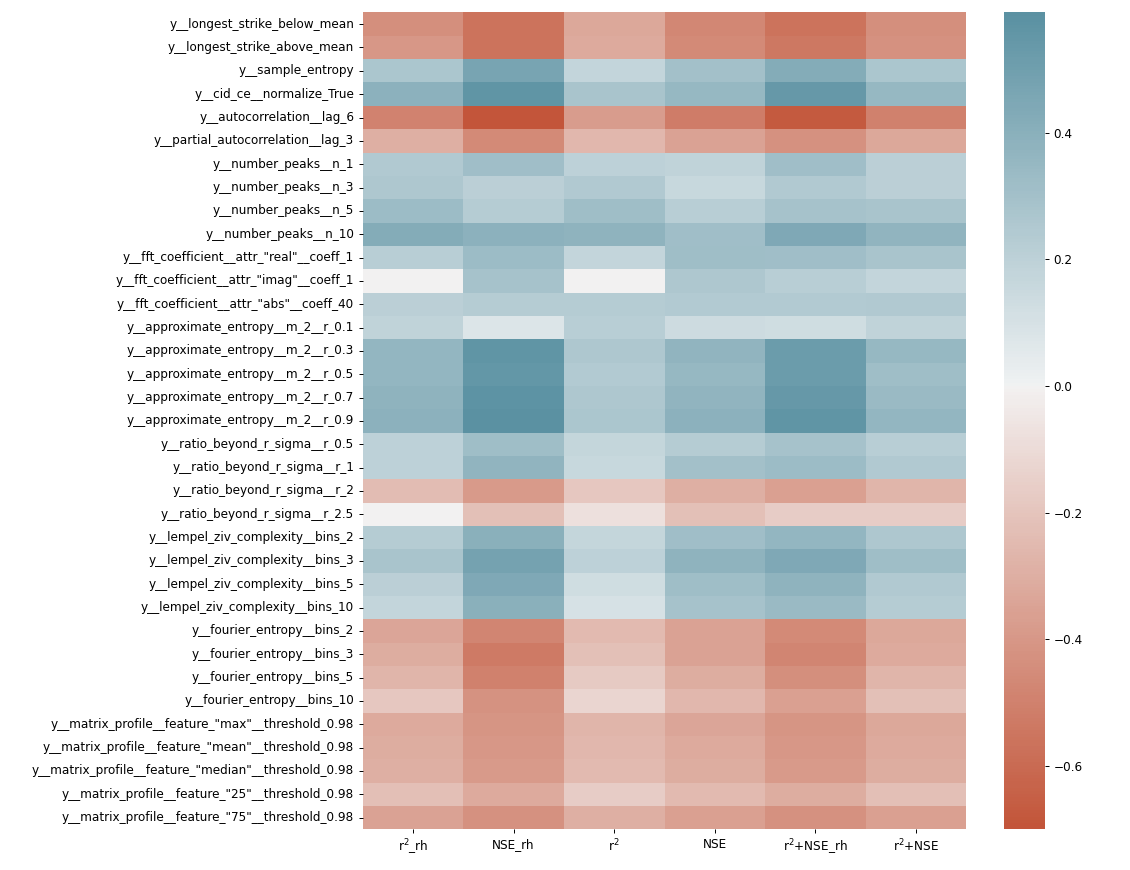

In [38]:
plt.figure(figsize=(13,10))
cmap = sns.diverging_palette(20, 220, as_cmap=True)
sns.heatmap(dfrvalcc2[:].set_index('variable'), annot=False,cmap=cmap, center=0)
plt.ylabel(' ')
plt.tight_layout()

In [191]:
gw_sel_int.drop(columns=lrem, inplace=True)

In [213]:
gw_sel_intc=gw_sel_int[dfrvalcc2.variable.values] ## I should select the 

In [215]:
gw_sel_intc.rename(columns = {
       'y__agg_autocorrelation__f_agg_"mean"__maxlag_40':'y__agg_autocorrelation__f_agg_mean__maxlag_40',
       'y__agg_autocorrelation__f_agg_"median"__maxlag_40':'y__agg_autocorrelation__f_agg_median__maxlag_40',
       'y__agg_autocorrelation__f_agg_"var"__maxlag_40':'y__agg_autocorrelation__f_agg_var__maxlag_40',
       'y__fft_coefficient__attr_"real"__coeff_1':'y__fft_coefficient__attr_real__coeff_1',
       'y__fft_coefficient__attr_"imag"__coeff_1':'y__fft_coefficient__attr_imag__coeff_1',
       'y__fft_coefficient__attr_"abs"__coeff_1':'y__fft_coefficient__attr_abs__coeff_1',
       'y__fft_coefficient__attr_"abs"__coeff_2':'y__fft_coefficient__attr_abs__coeff_2',
       'y__fft_coefficient__attr_"abs"__coeff_33':'y__fft_coefficient__attr_abs__coeff_33',
       'y__fft_coefficient__attr_"abs"__coeff_40':'y__fft_coefficient__attr_abs__coeff_40',
       'y__fft_coefficient__attr_"abs"__coeff_47':'y__fft_coefficient__attr_abs__coeff_47',
       'y__fft_coefficient__attr_"abs"__coeff_75':'y__fft_coefficient__attr_abs__coeff_75',
       'y__fft_coefficient__attr_"abs"__coeff_78':'y__fft_coefficient__attr_abs__coeff_78',
       'y__fft_coefficient__attr_"abs"__coeff_79':'y__fft_coefficient__attr_abs__coeff_79',
       'y__fft_coefficient__attr_"abs"__coeff_84':'y__fft_coefficient__attr_abs__coeff_84',
       'y__fft_coefficient__attr_"abs"__coeff_85':'y__fft_coefficient__attr_abs__coeff_85',
       'y__fft_coefficient__attr_"abs"__coeff_86':'y__fft_coefficient__attr_abs__coeff_86',
       'y__fft_coefficient__attr_"abs"__coeff_90':'y__fft_coefficient__attr_abs__coeff_90',
       'y__fft_coefficient__attr_"abs"__coeff_95':'y__fft_coefficient__attr_abs__coeff_95',
       'y__fft_coefficient__attr_"abs"__coeff_96':'y__fft_coefficient__attr_abs__coeff_96',
       'y__range_count__max_1000000000000.0__min_0':'y__range_count__max_10000000000000__min_0',
       'y__approximate_entropy__m_2__r_0.1':'y__approximate_entropy__m_2__r_01',
       'y__approximate_entropy__m_2__r_0.3':'y__approximate_entropy__m_2__r_03',
       'y__approximate_entropy__m_2__r_0.5':'y__approximate_entropy__m_2__r_05',
       'y__approximate_entropy__m_2__r_0.7':'y__approximate_entropy__m_2__r_07',
       'y__approximate_entropy__m_2__r_0.9':'y__approximate_entropy__m_2__r_09',
       'y__linear_trend__attr_"rvalue"':'y__linear_trend__attr_rvalue',
       'y__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"max"':'y__agg_linear_trend__attr_rvalue__chunk_len_5__f_agg_max',
       'y__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"min"':'y__agg_linear_trend__attr_rvalue__chunk_len_5__f_agg_min',
       'y__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"mean"':'y__agg_linear_trend__attr_rvalue__chunk_len_5__f_agg_mean',
       'y__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"max"':'y__agg_linear_trend__attr_rvalue__chunk_len_10__f_agg_max',
       'y__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"min"':'y__agg_linear_trend__attr_rvalue__chunk_len_10__f_agg_min',
       'y__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"mean"': 'y__agg_linear_trend__attr_rvalue__chunk_len_10__f_agg_mean',
       'y__agg_linear_trend__attr_"rvalue"__chunk_len_50__f_agg_"var"':'y__agg_linear_trend__attr_rvalue__chunk_len_50__f_agg_var',
       'y__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"min"':'y__agg_linear_trend__attr_slope__chunk_len_50__f_agg_min',
       'y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"min"':'y__agg_linear_trend__attr_stderr__chunk_len_50__f_agg_min',
       'y__augmented_dickey_fuller__attr_"teststat"__autolag_"AIC"':'y__augmented_dickey_fuller__attr_teststat__autolag_AIC',
       'y__ratio_beyond_r_sigma__r_0.5':'y__ratio_beyond_r_sigma__r_05',
       'y__ratio_beyond_r_sigma__r_2.5':'y__ratio_beyond_r_sigma__r_25',
       'y__query_similarity_count__query_None__threshold_0.0':'y__query_similarity_count__query_None__threshold_00',
       'y__matrix_profile__feature_"max"__threshold_0.98':'y__matrix_profile__feature_"max"__threshold_098',
       'y__matrix_profile__feature_"mean"__threshold_0.98':'y__matrix_profile__feature_"mean"__threshold_098',
       'y__matrix_profile__feature_"median"__threshold_0.98':'y__matrix_profile__feature_"median"__threshold_098',
       'y__matrix_profile__feature_"25"__threshold_0.98':'y__matrix_profile__feature_"25"__threshold_098',
       'y__matrix_profile__feature_"75"__threshold_0.98':'y__matrix_profile__feature_"75"__threshold_098'}, 
                  inplace = True)

In [216]:
gw_sel_intc.to_file(rpath+'/Pickle/gw_sel_int_tsfresh.shp')  

AttributeError: 'DataFrame' object has no attribute 'to_file'